In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [28]:
# Define fuzzy variable
height = ctrl.Antecedent(np.arange(150,211,1), 'height')
talent = ctrl.Antecedent(np.arange(0,11,1), 'talent')
chance = ctrl.Consequent(np.arange(0,91,1), 'chance')

In [30]:
# Define membership function
height.automf(3)
talent.automf(3)

chance['low'] = fuzz.trimf(chance.universe, [0,0,45])
chance['medium'] = fuzz.trimf(chance.universe, [0,45,90])
chance['high'] = fuzz.trimf(chance.universe, [45,90,90])

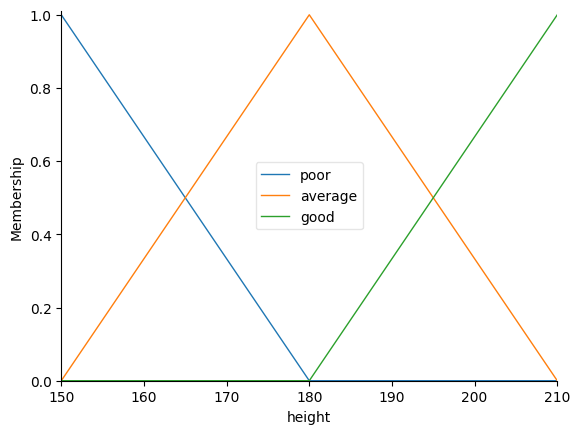

In [31]:
height.view()

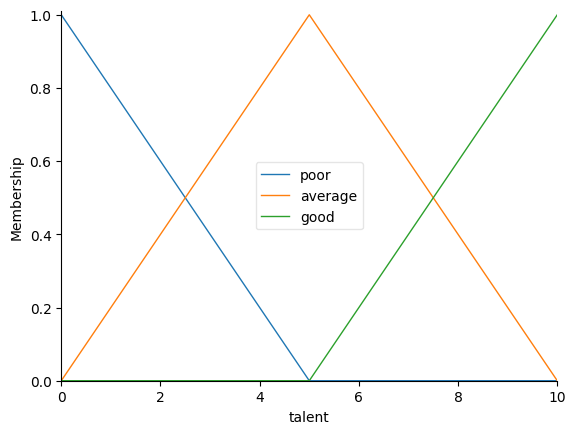

In [32]:
talent.view()

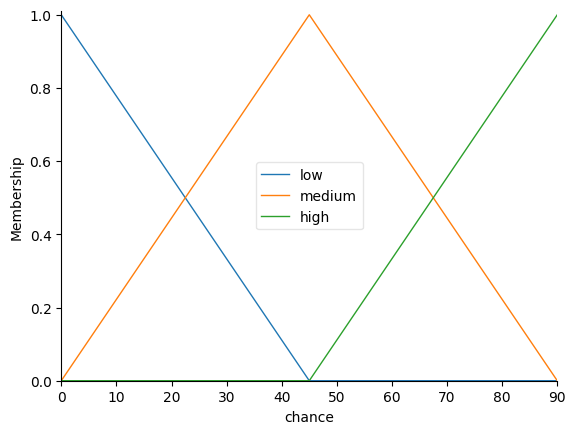

In [33]:
chance.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

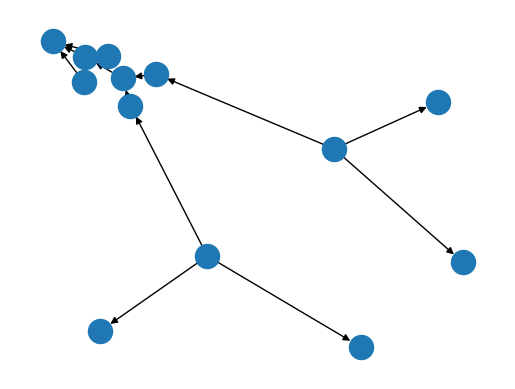

In [34]:
# Define rule
rule1 = ctrl.Rule(height['poor'] | talent['poor'], chance['low'])
rule2 = ctrl.Rule(height['average'], chance['medium'])
rule3 = ctrl.Rule(height['good'] | talent['good'], chance['high'])
rule1.view()

In [35]:
# Define control and simulation
chance_control = ctrl.ControlSystem([rule1, rule2, rule3])
chances = ctrl.ControlSystemSimulation(chance_control)

In [37]:
# Create input value
chances.input['height'] = 163
chances.input['talent'] = 6

# Compute chance based on imput value
chances.compute()

39.15771330077564


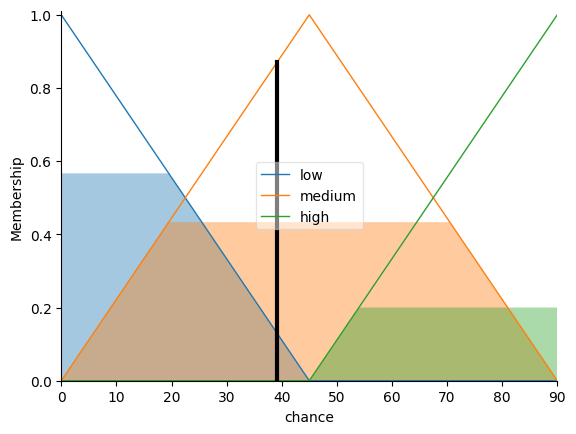

In [39]:
# Print chance
print(chances.output['chance'])
chance.view(sim=chances)